<a href="https://colab.research.google.com/github/basketbob/ML/blob/main/netology_DS/DZ5_stpy_32_KuzinVS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
from sklearn.datasets import load_iris
iris = load_iris()
#print(iris.DESCR)

In [ ]:
# 2. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
df = pd.DataFrame(iris.data, columns=['sepal_length', 'sepal_width', 2, 3])
variety = iris.target
df = df[['sepal_length', 'sepal_width']]

In [ ]:
# 3. Разделите данные на выборку для обучения и тестирования
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, variety, test_size=0.25, random_state=42)

In [ ]:
# 4. Постройте модель LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
iris_predict = lda.predict(X_test)
result = pd.DataFrame([y_test, iris_predict]).T
result.head()

,0,1
0,1,1
1,0,0
2,2,2
3,1,1
4,1,2


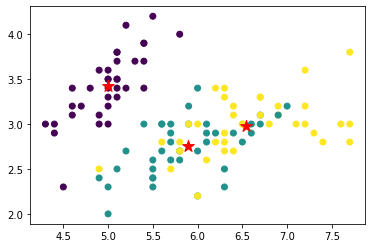

In [ ]:
# 5. Визуализируйте предсказания для тестовой выборки и центры классов
plt.scatter(x=X_train['sepal_length'], y=X_train['sepal_width'], c=y_train)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')
plt.show()

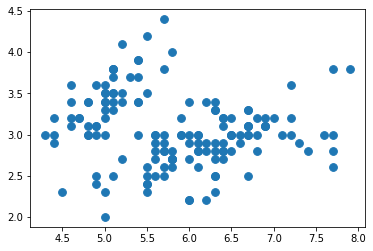

In [ ]:
# 6. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
plt.scatter(df['sepal_length'], df['sepal_width'], cmap='autumn', s=60)
plt.show()

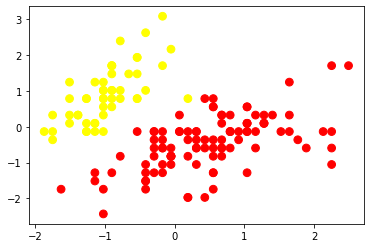

In [ ]:
# 7. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(X_scaled)
clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)